G - кф. усил. 			дБ:	 24 			раз:	 251.18864315095797
NF - кф. шума усил. 		дБ:	 3 			раз:	 1.9952623149688795
F - фактор. шума усил.  F = 10^(NF/10) 				раз:	 1.9952623149688795
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 25 	К:	 298.15
f0 - центральная резорнатора, 	ГГц:	 22.268284299999998 	Гц:	 22268284299.999996
Полоса резорнатора по 3дБ, 	МГц:	 2.568600000000032
Q - нагруженная добротность:		 8669.424706065452
P - out усил. 			дБм:	 17 			Вт:	 0.05011872336272723
fa - отстройка начала фликкер. 	кГц:	 1 			Гц:	 1000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -124.27964116083402


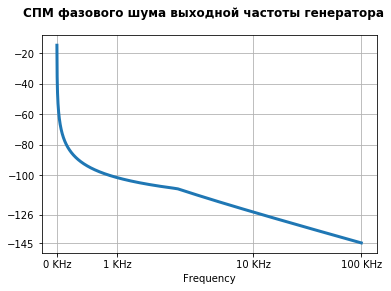

In [2]:
import math 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.ticker import EngFormatter 



F_min = 22.267
F_max = F_min + 0.0025686
#####################################################################
G = 24 # G - кф. усил
#####################################################################
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
#####################################################################
F = 3 # F - кф. шума усил.
#####################################################################
F_times = 10 ** (F/10)
print("NF - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
F_factor = 10 ** (F/10)
print("F - фактор. шума усил.  F = 10^(NF/10) \t\t\t\tраз:\t", F_factor)

k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 25 #290 - 273.15
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\tК:\t", t_k)

F_centr = (F_min + F_max) /2
#F_centr = 22


f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
#####################################################################
#Q_upload_qualiti = 9000 # Q - нагруженная добротность
#####################################################################
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
#####################################################################
P = 17 # P - out усил.
#####################################################################
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

#####################################################################
fa = 1  # fa - отстройка начала фликкер.
#####################################################################
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

#####################################################################
f = 10  # fa - отстройка от несущ.
#####################################################################
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**5
x = [i for i in range(1,step,10)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])








step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]
#print("len x2", len(x2))

#x2 = np.logspace(0, 5, len(x2)) 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='KHz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 

#plt.xticks([i for i in range(0,110,10)])
plt.yticks([ -20, -40, -60, -80, -100, -126, -145 ])

#ax.set_xscale ('linear', linthreshx=1, linscalex=1)

fig.suptitle('СПМ фазового шума выходной частоты генератора', fontweight ="bold") 

plt.grid()


plt.show()



$$L(f_{m}) = 10 \log{\left(
    \frac{G\times F \times k \times t}{2P}
    \begin{bmatrix} \left( \frac{f_{0}}{2Q} \right)^2 
        \times 
        \frac{f_{a}}{f_{m}^3}
        +
        \left( \frac{f_{0}}{2Q} \right)^2
        \times
        \frac{1}{f_{m}^2}
        +
        \frac{f_{a}}{f_{m}}
        +
        1
    \end{bmatrix}
\right)}$$
$$$$


G - кф. усил. 			дБ:	 24 			раз:	 251.18864315095797
F - кф. шума усил. 		дБ:	 3 			раз:	 1.9952623149688795
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 25 			К:	 298.15
f0 - центральная резорнатора, 	ГГц:	 22.401699999999998 		Гц:	 22401700000.0
Полоса резорнатора по 3дБ, 	МГц:	 1.40000000000029
Q - нагруженная добротность:		 16001.214285710972
P - out усил. 			дБм:	 17 			Вт:	 0.05011872336272723
fa - отстройка начала фликкер. 	кГц:	 10 			Гц:	 10000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -126.95401397404197


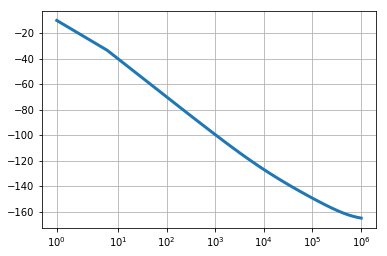

2


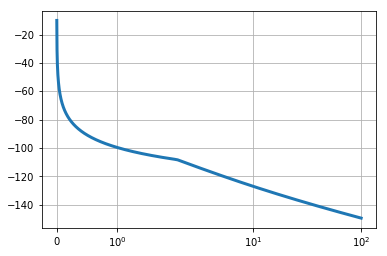

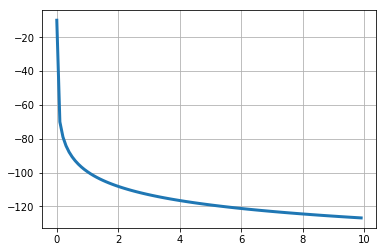

100


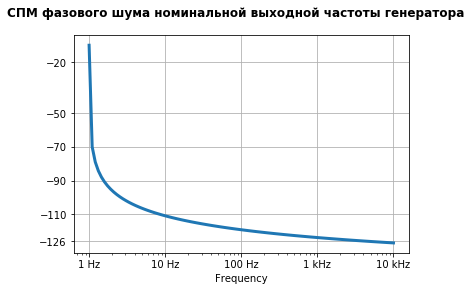

100
100
100


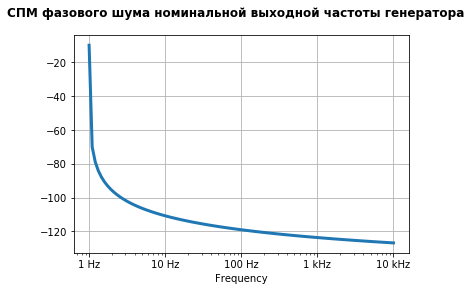

In [3]:
import math 

F_min = 22.401
F_max = 22.4024
G = 24
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
F = 3
F_times = 10 ** (F/10)
print("F - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 25
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\t\t\tК:\t", t_k)

F_centr = (F_min + F_max) /2
f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\t\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
P = 17
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

fa = 10
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

f = 10
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**6
x = [i for i in range(1,step,5)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])



import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 3)
plt.xticks([i for i in range(0,110,10)])
#plt.yticks([-50, -70, -90, -110, -125, -130, -135, -140, -147])
ax.set_xscale ('symlog')#'log'
#ax.set_xscale ('symlog', linthreshx=2, linscalex=5)
plt.grid()


plt.show()


print(2)

step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x2, y, linewidth = 3)
#plt.xticks([i for i in range(0,110,10)])
#plt.yticks([-50, -70, -90, -110, -125, -130, -135, -140, -147])
ax.set_xscale ('symlog')#'log'
#ax.set_xscale ('linear', linthreshx=1, linscalex=1)
plt.grid()


plt.show()

step = 10**4
x = [i for i in range(1,step,100)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x2, y, linewidth = 3)
#plt.xticks([i for i in range(0,110,10)])
#plt.yticks([-50, -70, -90, -110, -125, -130, -135, -140, -147])
#ax.set_xscale ('symlog')#'log'
#ax.set_xscale ('linear', linthreshx=1, linscalex=1)
plt.grid()


plt.show()


import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import EngFormatter 
  
#step = 10**6
#xs = [i for i in range(1,step,5)]


#val = np.random.RandomState(19680801)

#val = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]
#val = np.array(val)


xs = np.logspace(1, 9, 100) 

offset = 4

xs = np.logspace(0, 6-2, 100) 
#ys = (0.8 + 4 * val.uniform(size = 100)) * np.log10(xs)**2
#print(ys)
step = 10**4
x = [i for i in range(1,step,100)]
ys = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]
#ys.append(ys[-1])
print(len(ys))
  
fig, ax0 = plt.subplots() 
ax0.set_xscale('log') 
formatter0 = EngFormatter(unit ='Hz') 
ax0.xaxis.set_major_formatter(formatter0) 
ax0.plot(xs, ys, linewidth = 3)
ax0.set_xlabel('Frequency') 
  
fig.suptitle('СПМ фазового шума номинальной выходной частоты генератора', fontweight ="bold") 

#plt.yticks([-i for i in range(10,130,10)])
plt.yticks([-20, -50, -70, -90, -110, -126])


plt.grid()
plt.show() 


####################################################################################

offset = 4

xs = np.logspace(0, offset, 100) 

steps = 10**(offset)

step = 10**(offset-2)

print(step)

x = [i for i in range(1,steps,step)]
print(len(x))
ys = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]
#ys.append(ys[-1])
print(len(ys))
  
fig, ax0 = plt.subplots() 
ax0.set_xscale('log') 
formatter0 = EngFormatter(unit ='Hz') 
ax0.xaxis.set_major_formatter(formatter0) 
ax0.plot(xs, ys, linewidth = 3)
ax0.set_xlabel('Frequency') 
  
fig.suptitle('СПМ фазового шума номинальной выходной частоты генератора', fontweight ="bold") 

#plt.yticks([-i for i in range(10,130,10)])
#plt.yticks([-20, -50, -70, -90, -110, -126])


plt.grid()
plt.show() 

$$L(f_{m}) = 10 \log{\left(
    \frac{G\times F \times k \times t}{2P}
    \begin{bmatrix} \left( \frac{f_{0}}{2Q} \right)^2 
        \times 
        \frac{f_{a}}{f_{m}^3}
        +
        \left( \frac{f_{0}}{2Q} \right)^2
        \times
        \frac{1}{f_{m}^2}
        +
        \frac{f_{a}}{f_{m}}
        +
        1
    \end{bmatrix}
\right)}$$
$$$$


$$\begin{bmatrix} \left( \frac{f_{0}}{2Q} \right)^2 \end{bmatrix}$$

$$  \frac{f_{a}}{f_{m}^3}  $$

[ 0.98520527  0.76976277 -3.4374623  ...  3.48683354  3.03503473
  2.15757765]


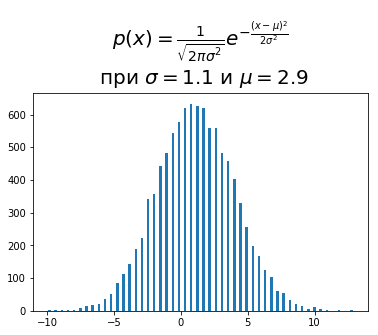

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)

print(data)

fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title(r'$p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$'+
             '\n при '+r'$\sigma = 1.1$' + ' и ' + r'$\mu = 2.9$',
             fontsize = 20,    #  увеличиваем размер
             pad = 20)    #  приподнимаем над "Axes"


plt.show()

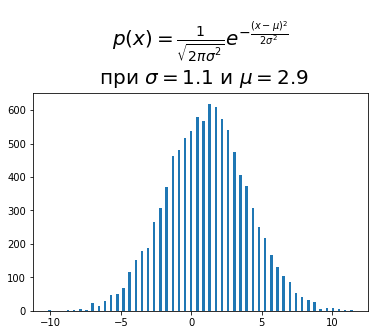

In [5]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)



fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title(r'$p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$'+
             '\n при '+r'$\sigma = 1.1$' + ' и ' + r'$\mu = 2.9$',
             fontsize = 20,    #  увеличиваем размер
             pad = 20)    #  приподнимаем над "Axes"


plt.show()

G - кф. усил. 			дБ:	 24 			раз:	 251.18864315095797
F - кф. шума усил. 		дБ:	 3 			раз:	 1.9952623149688795
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 25 			К:	 298.15
f0 - центральная резорнатора, 	ГГц:	 22.401699999999998 		Гц:	 22401700000.0
Полоса резорнатора по 3дБ, 	МГц:	 1.40000000000029
Q - нагруженная добротность:		 16001.214285710972
P - out усил. 			дБм:	 17 			Вт:	 0.05011872336272723
fa - отстройка начала фликкер. 	кГц:	 10 			Гц:	 10000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -126.95401397404197


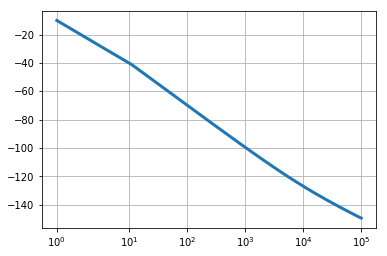

len x2: 10000 len x: 10000 len y: 10000
[11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]
[1.00115207 1.00230547 1.0034602  1.00461625 1.00577364 1.00693236
 1.00809242 1.00925382 1.01041655 1.01158062 1.01274603 1.01391279
 1.01508089 1.01625033 1.01742112 1.01859326 1.01976676 1.0209416
 1.0221178 ]
99991
100000.0


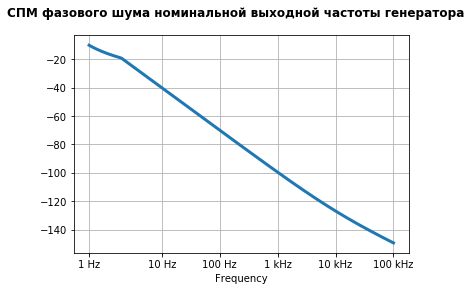

len x2 99999


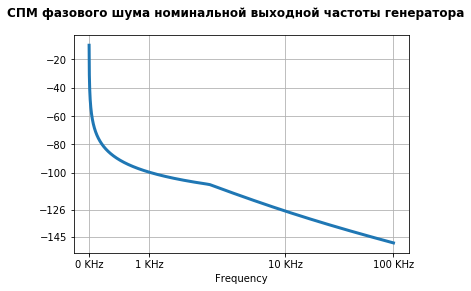

In [6]:
import math 

F_min = 22.401
F_max = 22.4024
G = 24
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
F = 3
F_times = 10 ** (F/10)
print("F - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 25
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\t\t\tК:\t", t_k)

F_centr = (F_min + F_max) /2
f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\t\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
P = 17
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

fa = 10
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

f = 10
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**5
x = [i for i in range(1,step,10)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])



import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth = 3)
plt.xticks([i for i in range(0,110,10)])
#plt.yticks([-50, -70, -90, -110, -125, -130, -135, -140, -147])
ax.set_xscale ('symlog')#'log'
#ax.set_xscale ('symlog', linthreshx=2, linscalex=5)
plt.grid()


plt.show()



####################################################################################

x2 = np.logspace(0, 5, len(y)) 

print("len x2:", len(x2), "len x:", len(x), "len y:", len(y))
print(x[1:20])
print(x2[1:20])

print(x[-1])
print(x2[-1])

y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x2]
  
fig = plt.figure()
#fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)


#fig, ax = plt.subplots() 
ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='Hz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 
#ax0.set_xscale ('log')#'log'
  
fig.suptitle('СПМ фазового шума номинальной выходной частоты генератора', fontweight ="bold") 

#plt.yticks([-20, -50, -70, -90, -110, -126])



plt.grid()
plt.show() 




step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]
print("len x2", len(x2))

#x2 = np.logspace(0, 5, len(x2)) 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='KHz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 

#plt.xticks([i for i in range(0,110,10)])
plt.yticks([ -20, -40, -60, -80, -100, -126, -145 ])

#ax.set_xscale ('linear', linthreshx=1, linscalex=1)

fig.suptitle('СПМ фазового шума номинальной выходной частоты генератора', fontweight ="bold") 

plt.grid()


plt.show()


G - кф. усил. 			дБ:	 24 			раз:	 251.18864315095797
F - кф. шума усил. 		дБ:	 3 			раз:	 1.9952623149688795
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 25 			К:	 298.15
f0 - центральная резорнатора, 	ГГц:	 22.401699999999998 	Гц:	 22401700000.0
Полоса резорнатора по 3дБ, 	МГц:	 1.40000000000029
Q - нагруженная добротность:		 16001.214285710972
P - out усил. 			дБм:	 17 			Вт:	 0.05011872336272723
fa - отстройка начала фликкер. 	кГц:	 1 			Гц:	 1000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -129.55038707909952


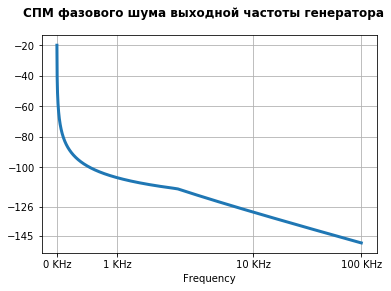

In [7]:
import math 

F_min = 22.401
F_max = 22.4024
G = 24
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
F = 3
F_times = 10 ** (F/10)
print("F - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 25
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\t\t\tК:\t", t_k)

F_centr = (F_min + F_max) /2
f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
P = 17
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

fa = 1
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

f = 10
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**5
x = [i for i in range(1,step,10)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])



import matplotlib.pyplot as plt




step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]
#print("len x2", len(x2))

#x2 = np.logspace(0, 5, len(x2)) 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='KHz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 

#plt.xticks([i for i in range(0,110,10)])
plt.yticks([ -20, -40, -60, -80, -100, -126, -145 ])

#ax.set_xscale ('linear', linthreshx=1, linscalex=1)

fig.suptitle('СПМ фазового шума выходной частоты генератора', fontweight ="bold") 

plt.grid()


plt.show()


G - кф. усил. 			дБ:	 12 			раз:	 15.848931924611133
NF - кф. шума усил. 		дБ:	 4 			раз:	 2.51188643150958
F - фактор. шума усил.  F = 10^(NF/10) 				раз:	 2.51188643150958
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 16.850000000000023 	К:	 290.0
f0 - центральная резорнатора, 	ГГц:	 22 			Гц:	 22000000000
Полоса резорнатора по 3дБ, 	МГц:	 9.99999999999801
Q - нагруженная добротность:		 9000
P - out усил. 			дБм:	 10 			Вт:	 0.01
fa - отстройка начала фликкер. 	кГц:	 1 			Гц:	 1000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -128.83030803134997


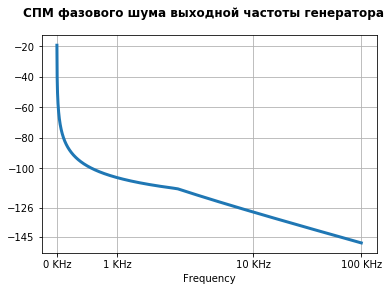

In [8]:
import math 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.ticker import EngFormatter 



F_min = 21.992
F_max = 22.002
#####################################################################
G = 12 # G - кф. усил
#####################################################################
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
#####################################################################
F = 4 # F - кф. шума усил.
#####################################################################
F_times = 10 ** (F/10)
print("NF - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
F_factor = 10 ** (F/10)
print("F - фактор. шума усил.  F = 10^(NF/10) \t\t\t\tраз:\t", F_factor)

k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 290 - 273.15
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\tК:\t", t_k)

F_centr = (F_min + F_max) /2
F_centr = 22


f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\t\t\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
#####################################################################
Q_upload_qualiti = 9000 # Q - нагруженная добротность
#####################################################################
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
#####################################################################
P = 10 # P - out усил.
#####################################################################
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

#####################################################################
fa = 1  # fa - отстройка начала фликкер.
#####################################################################
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

#####################################################################
f = 10  # fa - отстройка от несущ.
#####################################################################
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**5
x = [i for i in range(1,step,10)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])








step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]
#print("len x2", len(x2))

#x2 = np.logspace(0, 5, len(x2)) 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='KHz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 

#plt.xticks([i for i in range(0,110,10)])
plt.yticks([ -20, -40, -60, -80, -100, -126, -145 ])

#ax.set_xscale ('linear', linthreshx=1, linscalex=1)

fig.suptitle('СПМ фазового шума выходной частоты генератора', fontweight ="bold") 

plt.grid()


plt.show()


# 22 03 02

G - кф. усил. 			дБ:	 12 			раз:	 15.848931924611133
NF - кф. шума усил. 		дБ:	 4 			раз:	 2.51188643150958
F - фактор. шума усил.  F = 10^(NF/10) 				раз:	 2.51188643150958
k - пост больцмана 		Дж/К:	 1.3799999999999998e-23
t - температура среды 		С:	 16.850000000000023 	К:	 290.0
f0 - центральная резорнатора, 	ГГц:	 22 			Гц:	 22000000000
Полоса резорнатора по 3дБ, 	МГц:	 9.99999999999801
Q - нагруженная добротность:		 9000
P - out усил. 			дБм:	 10 			Вт:	 0.01
fa - отстройка начала фликкер. 	кГц:	 1 			Гц:	 1000
fa - отстройка от несущ. 	кГц:	 10 			Гц:	 10000
L =  -128.83030803134997


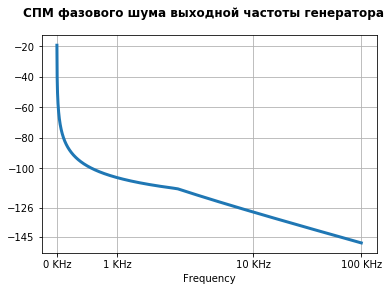

In [9]:
import math 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.ticker import EngFormatter 



F_min = 21.992
F_max = 22.002
#####################################################################
G = 12 # G - кф. усил
#####################################################################
G_times =  10 ** (G/10)
print("G - кф. усил. \t\t\tдБ:\t", G, "\t\t\tраз:\t", G_times)
#####################################################################
F = 4 # F - кф. шума усил.
#####################################################################
F_times = 10 ** (F/10)
print("NF - кф. шума усил. \t\tдБ:\t", F, "\t\t\tраз:\t", F_times)
F_factor = 10 ** (F/10)
print("F - фактор. шума усил.  F = 10^(NF/10) \t\t\t\tраз:\t", F_factor)

k = 1.38 * 10 ** -23
print("k - пост больцмана \t\tДж/К:\t", k)

t = 290 - 273.15
t_k = t + 273.15
print("t - температура среды \t\tС:\t",t, "\tК:\t", t_k)

F_centr = (F_min + F_max) /2
F_centr = 22


f0_Hz = F_centr * 10 ** 9
print("f0 - центральная резорнатора, \tГГц:\t",F_centr, "\t\t\tГц:\t", f0_Hz)
F_band = (- F_min + F_max)*1000
print("Полоса резорнатора по 3дБ, \tМГц:\t",F_band)
Q_upload_qualiti = F_centr/F_band*1000
#Q_upload_qualiti = 5000
#####################################################################
Q_upload_qualiti = 9000 # Q - нагруженная добротность
#####################################################################
print("Q - нагруженная добротность:\t\t",Q_upload_qualiti)
#####################################################################
P = 10 # P - out усил.
#####################################################################
P_vt = 0.001 * 10 ** (P / 10)
print("P - out усил. \t\t\tдБм:\t",P, "\t\t\tВт:\t", P_vt)

#####################################################################
fa = 1  # fa - отстройка начала фликкер.
#####################################################################
fa_hz = fa * 1000
print("fa - отстройка начала фликкер. \tкГц:\t",fa, "\t\t\tГц:\t", fa_hz)

#####################################################################
f = 10  # fa - отстройка от несущ.
#####################################################################
f_hz = f * 1000
print("fa - отстройка от несущ. \tкГц:\t",f, "\t\t\tГц:\t", f_hz)



def Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti ):
    GFKT_2P = ( G_times * F_times * k * t_k ) / (2 * P_vt)
    f0_2Q__up2 = (f0_Hz /( 2 * Q_upload_qualiti) ) ** 2
    result = 10 * math.log10( GFKT_2P * ( f0_2Q__up2 *  (fa_hz / ( f_hz ** 3) ) + f0_2Q__up2 * (1/f_hz ** 2)  + fa_hz / f_hz + 1 ) )
    return result

def Lesson_step(n):
    return n

result = Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, f_hz,  Q_upload_qualiti )
print("L = ", result)

step = 10**5
x = [i for i in range(1,step,10)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

#print("y-1:", y[-1])
#print("y-1:", y[0])








step = 10**5
x = [i for i in range(1,step,1)]
#print(x)
y = [Lesson(G_times, F_times, k, t_k, P_vt, f0_Hz, fa_hz, i*1,  Q_upload_qualiti ) for i in x]

x2 = [i/1000 for i in x]
#print("len x2", len(x2))

#x2 = np.logspace(0, 5, len(x2)) 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('symlog') 
formatter0 = EngFormatter(unit ='KHz') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(x2, y, linewidth = 3)
ax.set_xlabel('Frequency') 

#plt.xticks([i for i in range(0,110,10)])
plt.yticks([ -20, -40, -60, -80, -100, -126, -145 ])

#ax.set_xscale ('linear', linthreshx=1, linscalex=1)

fig.suptitle('СПМ фазового шума выходной частоты генератора', fontweight ="bold") 

plt.grid()


plt.show()
